In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from sklearn import tree
from os import system

from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,roc_auc_score

In [8]:
data=pd.read_csv(r'F:\bank-full - Govindaraj V.csv')

In [9]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
data.dtypes.to_frame('DATatype')

,DATatype
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


C:\Users\SANMITH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

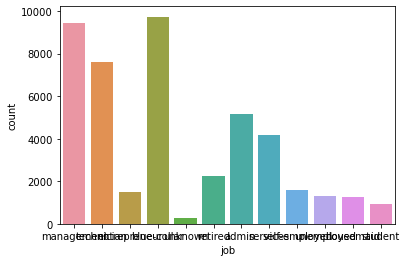

In [13]:
sns.countplot(data['job'])

C:\Users\SANMITH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

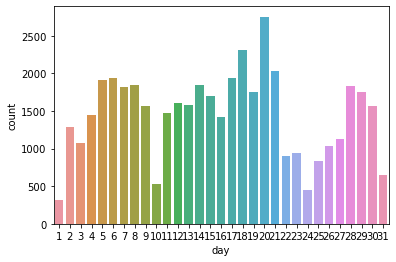

In [14]:
sns.countplot(data['day'])

C:\Users\SANMITH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

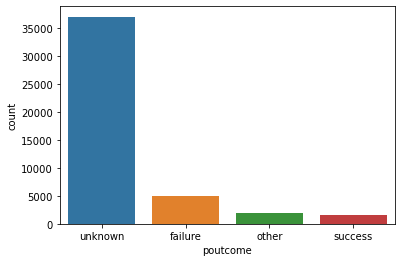

In [15]:
sns.countplot(data['poutcome'])

C:\Users\SANMITH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

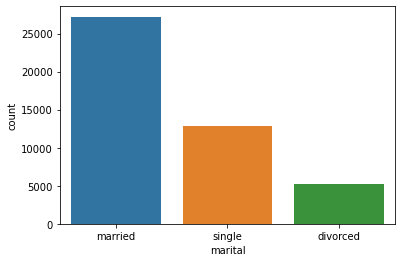

In [16]:
sns.countplot(data['marital'])

C:\Users\SANMITH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

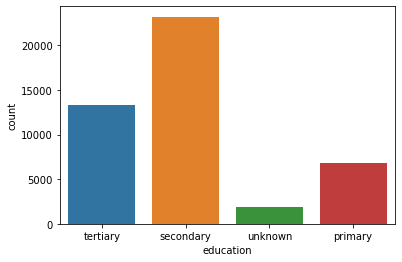

In [17]:
sns.countplot(data['education'])

In [19]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [20]:
data.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


C:\Users\SANMITH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SANMITH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SANMITH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

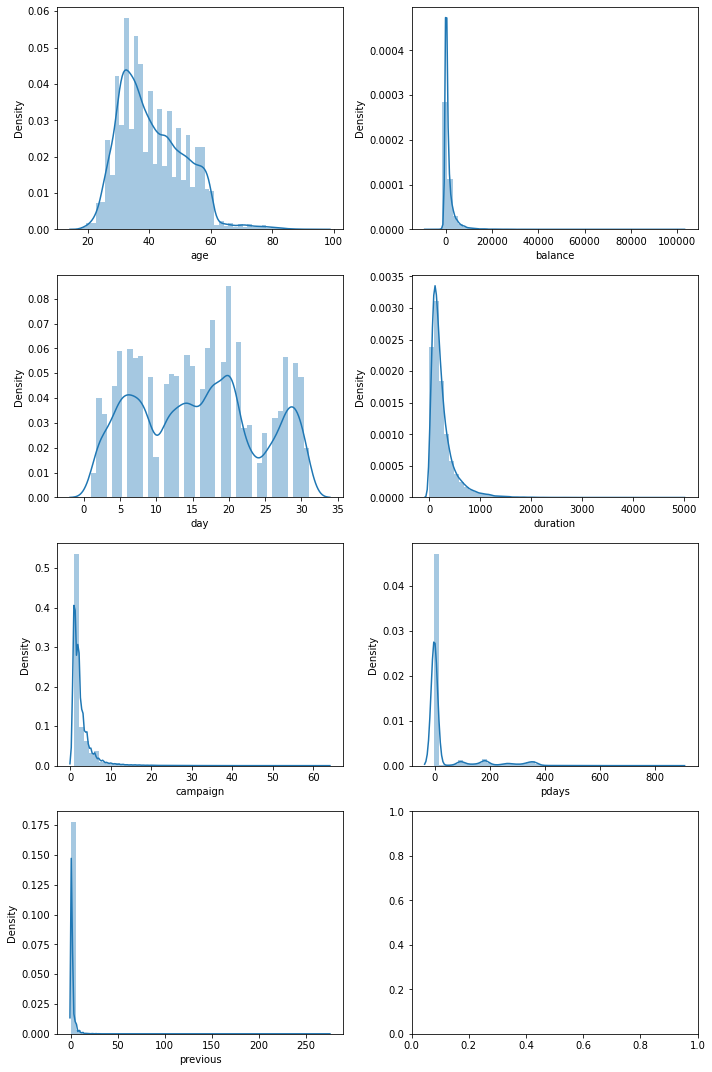

In [25]:
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.distplot(data['age'],ax=axe[0])
sns.distplot(data['balance'],ax=axe[1])
sns.distplot(data['day'],ax=axe[2])
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])
sns.distplot(data['pdays'],ax=axe[5])
sns.distplot(data['previous'],ax=axe[6])

fig.tight_layout()
fig.show()



<ipython-input-34-5d183e1977b1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


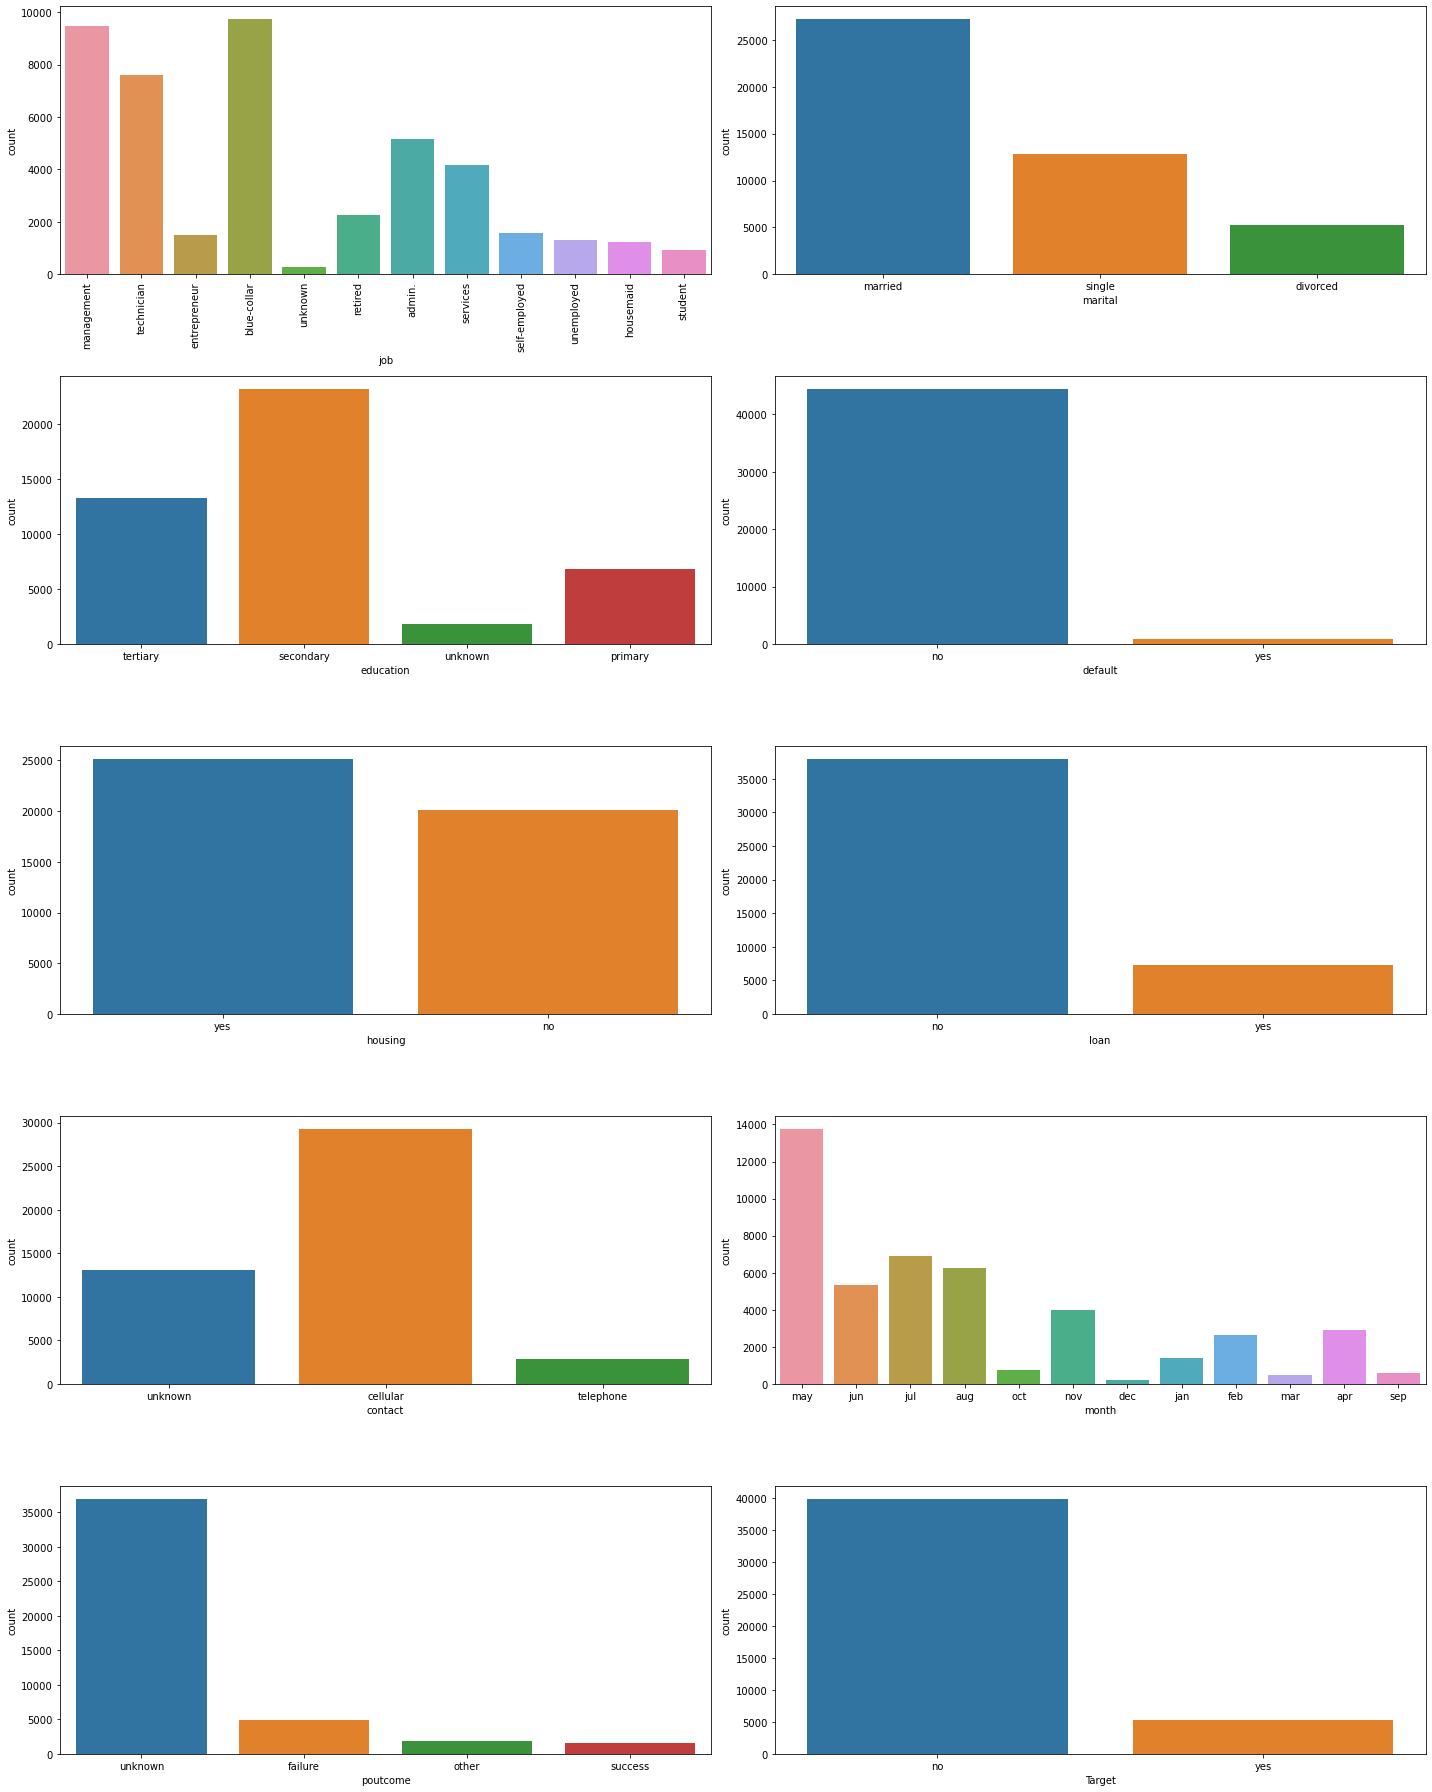

In [34]:
fig,axe=plt.subplots(nrows=5,ncols=2,figsize=(20,25))
axe=axe.flatten()
plot=sns.countplot(x=data['job'],data=data,ax=axe[0])
plt.setp(plot.get_xticklabels(),rotation=90)
sns.countplot(x=data['marital'],data=data,ax=axe[1])

sns.countplot(x=data['education'],data=data,ax=axe[2])
sns.countplot(x=data['default'],data=data,ax=axe[3])
sns.countplot(x=data['housing'],data=data,ax=axe[4])
sns.countplot(x=data['loan'],data=data,ax=axe[5])
sns.countplot(x=data['contact'],data=data,ax=axe[6])
sns.countplot(x=data['month'],data=data,ax=axe[7])
sns.countplot(x=data['poutcome'],data=data,ax=axe[8])
sns.countplot(x=data['Target'],data=data,ax=axe[9])

fig.tight_layout()
fig.show()

In [35]:
data.skew().to_frame('Skewness').T

,age,balance,day,duration,campaign,pdays,previous
Skewness,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


C:\Users\SANMITH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-36-3d28739a9194>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


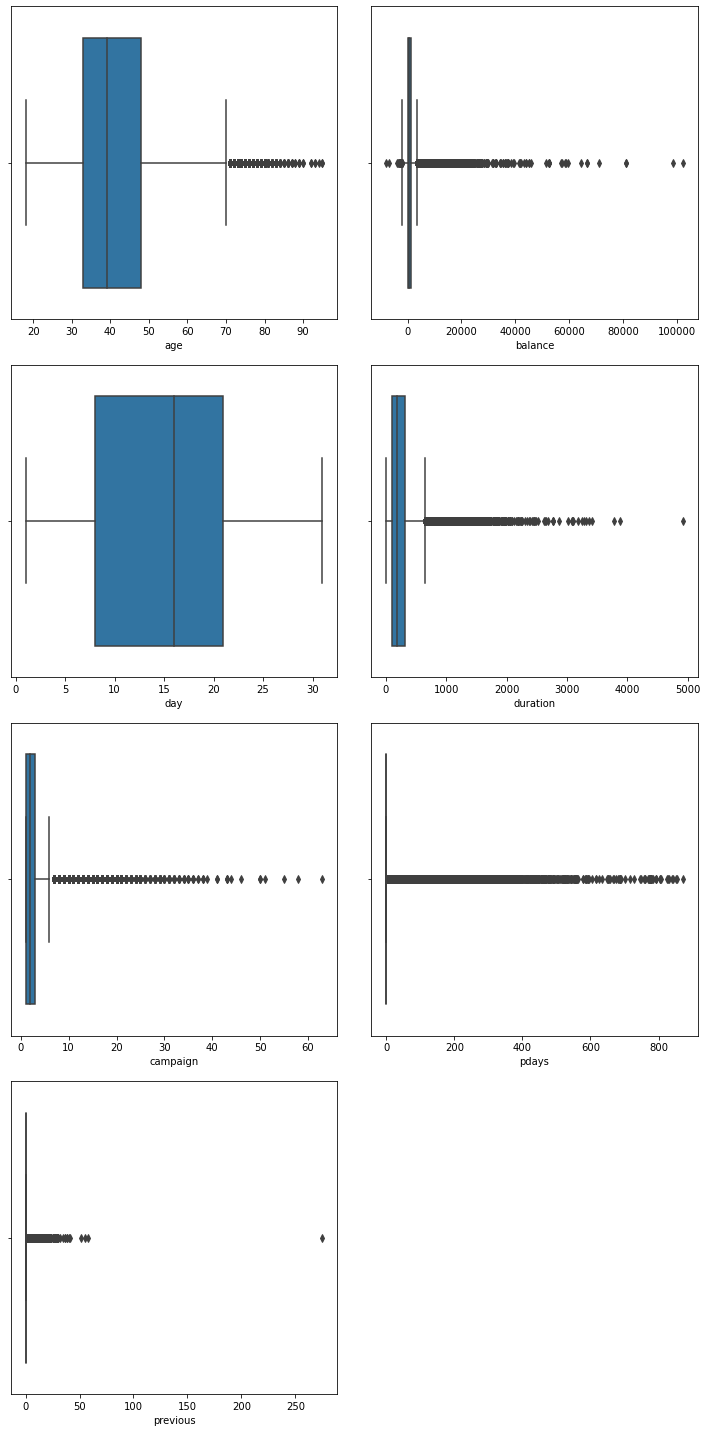

In [36]:
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10,20))
axe=axe.flatten()
sns.boxplot(x='age',data=data,ax=axe[0])
sns.boxplot(x='balance',data=data,ax=axe[1])
sns.boxplot(x='day',data=data,ax=axe[2])
sns.boxplot(x='duration',data=data,ax=axe[3])
sns.boxplot(x='campaign',data=data,ax=axe[4])
sns.boxplot(x='pdays',data=data,ax=axe[5])
sns.boxplot(data['previous'],ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

In [42]:
from sklearn.preprocessing import LabelEncoder
df=data.copy()
encoder=LabelEncoder()

df['default']=encoder.fit_transform(df['default']).astype('int')

df['marital']=encoder.fit_transform(df['marital']).astype('int')
df['loan']=encoder.fit_transform(df['loan']).astype('int')
df['housing']=encoder.fit_transform(df['housing']).astype('int')
df['Target']=encoder.fit_transform(df['Target']).astype('int')
df['month']=encoder.fit_transform(df['month']).astype('int')
df['poutcome']=encoder.fit_transform(df['poutcome']).astype('int')
df['education']=encoder.fit_transform(df['education']).astype('int')

df['job']=encoder.fit_transform(df['job']).astype('int')
df['contact']=encoder.fit_transform(df['contact']).astype('int')


df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  Target     45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [46]:
x=df.drop(['Target'],axis=1)
y=df['Target']

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [48]:
scaler=StandardScaler()
scaled_xtrain=scaler.fit_transform(xtrain)
scaled_xtest=scaler.fit_transform(xtest)


# LOGISITIC REGRESSION MODEL

In [52]:
log_reg=LogisticRegression(solver='liblinear')
log_reg.fit(scaled_xtrain,ytrain)
ypred=log_reg.predict(scaled_xtest)
print('\nAccuracy score\n',accuracy_score(ytest,ypred))
print('\nConfusion matrix\n',confusion_matrix(ytest,ypred))
print('\nclassification report\n',classification_report(ytest,ypred))


Accuracy score
 0.8956098639831914

Confusion matrix
 [[7854  143]
 [ 801  245]]

classification report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7997
           1       0.63      0.23      0.34      1046

    accuracy                           0.90      9043
   macro avg       0.77      0.61      0.64      9043
weighted avg       0.88      0.90      0.87      9043



# GAUSSION MODEL

In [55]:
naive=GaussianNB()
naive.fit(scaled_xtrain,ytrain)
ypred_naive=naive.predict(scaled_xtest)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_naive))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_naive))
print('\n The Classification Report \n',classification_report(ytest,ypred_naive))


The Accuracy score
 0.8384385712705961

 The Confusion matrix 
 [[7060  937]
 [ 524  522]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.88      0.91      7997
           1       0.36      0.50      0.42      1046

    accuracy                           0.84      9043
   macro avg       0.64      0.69      0.66      9043
weighted avg       0.86      0.84      0.85      9043



# SVC

In [56]:
svc=SVC()
svc.fit(scaled_xtrain,ytrain)
ypred_svc=svc.predict(scaled_xtest)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_svc))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_svc))
print('\n The Classification Report \n',classification_report(ytest,ypred_svc))



The Accuracy score
 0.8997014265177485

 The Confusion matrix 
 [[7843  154]
 [ 753  293]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7997
           1       0.66      0.28      0.39      1046

    accuracy                           0.90      9043
   macro avg       0.78      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043



In [57]:
dtree=DecisionTreeClassifier()
dtree.fit(scaled_xtrain,ytrain)
ypred_dtree=dtree.predict(scaled_xtest)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_dtree))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_dtree))
print('\n The Classification Report \n',classification_report(ytest,ypred_dtree))


The Accuracy score
 0.8716134026318699

 The Confusion matrix 
 [[7408  589]
 [ 572  474]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7997
           1       0.45      0.45      0.45      1046

    accuracy                           0.87      9043
   macro avg       0.69      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043



# Ensemble Techniques


# 1. Bagging Classifier

In [58]:
bagc=BaggingClassifier(base_estimator=dtree,n_estimators=200,random_state=1)
bagc.fit(scaled_xtrain,ytrain)
ypred_bagc=bagc.predict(scaled_xtest)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_bagc))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_bagc))
print('\n The Classification Report \n',classification_report(ytest,ypred_bagc))


The Accuracy score
 0.908437465442884

 The Confusion matrix 
 [[7716  281]
 [ 547  499]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7997
           1       0.64      0.48      0.55      1046

    accuracy                           0.91      9043
   macro avg       0.79      0.72      0.75      9043
weighted avg       0.90      0.91      0.90      9043



# Randomforest

In [61]:
randf=RandomForestClassifier(n_estimators=200,random_state=2,max_features=4)
randf.fit(scaled_xtrain,ytrain)
ypred_rand=randf.predict(scaled_xtest)

print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_rand))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_rand))
print('\n The Classification Report \n',classification_report(ytest,ypred_rand))


The Accuracy score
 0.9097644586973349

 The Confusion matrix 
 [[7770  227]
 [ 589  457]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7997
           1       0.67      0.44      0.53      1046

    accuracy                           0.91      9043
   macro avg       0.80      0.70      0.74      9043
weighted avg       0.90      0.91      0.90      9043



# Adaboost

In [62]:
adab=AdaBoostClassifier(n_estimators=200,random_state=2)
adab.fit(scaled_xtrain,ytrain)
ypred_ada=adab.predict(scaled_xtest)

print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_ada))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_ada))
print('\n The Classification Report \n',classification_report(ytest,ypred_ada))


The Accuracy score
 0.9030189096538759

 The Confusion matrix 
 [[7762  235]
 [ 642  404]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7997
           1       0.63      0.39      0.48      1046

    accuracy                           0.90      9043
   macro avg       0.78      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043



# Gradient Boosting

In [64]:

gb=GradientBoostingClassifier(n_estimators=200,random_state=2)
gb.fit(scaled_xtrain,ytrain)
ypred_gb=gb.predict(scaled_xtest)

print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_gb))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_gb))
print('\n The Classification Report \n',classification_report(ytest,ypred_gb))


The Accuracy score
 0.9115337830366029

 The Confusion matrix 
 [[7779  218]
 [ 582  464]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7997
           1       0.68      0.44      0.54      1046

    accuracy                           0.91      9043
   macro avg       0.81      0.71      0.74      9043
weighted avg       0.90      0.91      0.90      9043

